# Project Title - “Price Determinants of Tablets in the Indian Market: A Web Scraping and Exploratory Data Analysis Project”

## Problem Statement - This project aims to analyze the key factors influencing tablet prices in the Indian market using web-scraped data. By exploring attributes such as brand, RAM,ROM,battery, display size, and connectivity, the study identifies trends and correlations affecting pricing. The goal is to uncover data-driven insights into how specifications impact tablet cost and brand pricing strategies.

In [2]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [476]:
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
        "(KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
    ),
    "Accept-Language": "en-US,en;q=0.9",
}


In [477]:
Title = []
Brand = []
Model = []
RAM = []
ROM = []
Display_Size = []
Connectivity_Type = []
Rear_Camera = []
Front_Camera = []
Battery = []
Version = []
Warrenty = []
Processor = []
Ratings = []
Reviews_Count = []
Final_Price = []
Exchange_discount = []
Original_Price = []
discount_percent = []

for i in range(1,41):
    url = f'https://www.flipkart.com/search?q=Tablet&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page={i}'
    response = requests.get(url,headers=headers)
    soup = BeautifulSoup(response.text,'html.parser')


    for b in soup.find_all("div",class_="tUxRFH"):    #Container
        text = b.text   #only text


        t = b.find('div',class_='KzDlHZ')  #title
        if t:
            Title.append(t.text)
        else:
            Title.append(np.nan)
        
        ra = b.find('div',class_='XQDdHH')  #Ratings
        if ra:
            Ratings.append(ra.text)
        else:
            Ratings.append(np.nan)

        regex_b = re.findall(r'Compare(\w+)\s',text) # Brand
        if regex_b:
            Brand.append(regex_b[0])
        else:
            Brand.append(np.nan)

        regex_m = re.findall(r'Compare\w+\s(.+)\s\d+\sGB\sRAM',text) # Model
        if regex_m:
            Model.append(regex_m[0])
        else:
            Model.append(np.nan)
    
        r = re.findall(r"(\d+(?:\.\d+)?)\sGB\sRAM\s\|",text)   #pattern for RAM
        if r:
            RAM.append(r[0])
        else:
            RAM.append(np.nan)

        ro = re.findall(r'\|?\s(\d+)\sGB\sROM',text)   #pattern for ROM
        if ro:
            ROM.append(ro[0])
        else:
            ROM.append(np.nan)

        Ds = re.findall(r'\(([-+]?\d*\.?\d+)\s\w+\)',text) # Pattern for Display size
        if Ds:
            Display_Size.append(Ds[0])
        else:
            Display_Size.append(np.nan)

        con = re.findall(r'\swith\sWi-Fi\sOnly',text) # connectivity
        if con:
            Connectivity_Type.append('Wi-Fi only')
        else:
            Connectivity_Type.append('Wi-Fi+SIM')

        cam = re.findall(r'([-+]?\d*\.?\d+)\sMP\sPrimary',text) # Rear_camera
        if cam:
            Rear_Camera.append(cam[0])
        else:
            Rear_Camera.append(np.nan)

        frcam = re.findall(r'([-+]?\d*\.?\d+)\sMP\sFront',text) #Front_camera
        if frcam:
            Front_Camera.append(frcam[0])
        else:
            Front_Camera.append(np.nan)

        ba = re.findall(r'\sBattery:\s(\d+)\smAh|\sBattery:\s(\d+)\smAH',text) # battery
        if ba:
            Battery.append(ba[0])
        else:
            Battery.append(np.nan)

        ver = re.findall(r'Front(\w+)',text) # version
        if ver:
            Version.append(ver[0])
        else:
            Version.append(np.nan)

        w = re.findall(r'(\d)\sYear',text) # warrenty
        if w:
            Warrenty.append(w[0])
        else:
            Warrenty.append('0')

        p = re.findall(r'Processor:\s(\w+)',text) # processor
        if p:
            Processor.append(p[0])
        else:
            Processor.append(np.nan)

        rev = re.findall(r'&(.+)\sReviews',text)  # Reviews_count
        if rev:
            Reviews_Count.append(rev[0][1:])
        else:
            Reviews_Count.append(np.nan)

        orgp = b.find('div',class_='yRaY8j ZYYwLA')  #Original price
        if orgp:
            Original_Price.append(orgp.text)
        else:
            Original_Price.append(np.nan)

        dis = b.find('div',class_='UkUFwK')  #discount_percent
        if dis:
            discount_percent.append(dis.text)
        else:
            discount_percent.append(np.nan)

        pr = b.find('div',class_="Nx9bqj _4b5DiR")  # Final_price
        if pr:
            Final_Price.append(pr.text)
        else:
            Final_Price.append(np.nan)
            
        ed = re.findall(r'₹(\d+,\d+)\sOff',text) # Exchange_price
        if ed:
            Exchange_discount.append(ed[0])
        else:
            Exchange_discount.append(np.nan) 

            
dict1 = {"TITLE":Title,"BRAND":Brand, "MODEL":Model, "RAM(GB)": RAM ,"ROM(GB)": ROM, 
         "DISPLAY_SIZE(inch)" : Display_Size,"CONNECTIVITY_TYPE":Connectivity_Type ,"REAR_CAMERA(MP)": Rear_Camera,"FRONT_CAMERA(MP)" : Front_Camera ,
         "BATTERY(mAh)": Battery ,"VERSION":Version,"WARRENTY": Warrenty,"PROCESSOR": Processor,"RATINGS": Ratings ,"REVIEWS_COUNT": Reviews_Count , 
         "ORIGINAL_PRICE(INR)":Original_Price,"FINAL_PRICE(INR)" : Final_Price,"DISCOUNT_PERCENT": discount_percent, 
         "EXCHANGE_DISCOUNT_PRICE(INR)": Exchange_discount}

In [478]:
print(len(Title),len(Brand),len(Model),len(RAM),len(ROM),len(Display_Size),
      len(Connectivity_Type),len(Rear_Camera),len(Front_Camera),len(Battery),
      len(Version),len(Warrenty),len(Processor),len(Ratings),len(Reviews_Count),len(Final_Price),len(Exchange_discount),len(Original_Price),
      len(discount_percent))

960 960 960 960 960 960 960 960 960 960 960 960 960 960 960 960 960 960 960


In [479]:
df = pd.DataFrame(dict1)

In [480]:
df

,TITLE,BRAND,MODEL,RAM(GB),ROM(GB),DISPLAY_SIZE(inch),CONNECTIVITY_TYPE,REAR_CAMERA(MP),FRONT_CAMERA(MP),BATTERY(mAh),VERSION,WARRENTY,PROCESSOR,RATINGS,REVIEWS_COUNT,ORIGINAL_PRICE(INR),FINAL_PRICE(INR),DISCOUNT_PERCENT,EXCHANGE_DISCOUNT_PRICE(INR)
0,REDMI Pad SE 8 GB RAM 128 GB ROM 11.0 inch wi...,REDMI,Pad SE,8,128,11.0,Wi-Fi only,8.0,5,"(8000, )",Android,1,Snapdragon,4.4,992,"₹19,999","₹12,999",35% off,"9,800"
1,OnePlus Pad Lite 6 GB RAM 128 GB ROM 11.0 inch...,OnePlus,Pad Lite,6.0,128,11.0,Wi-Fi only,5,5,"(9340, )",Others,1,MediaTek,4.4,113,"₹19,999","₹14,999",25% off,"11,200"
2,REDMI Pad SE 8 GB RAM 128 GB ROM 11.0 inch wi...,REDMI,Pad SE,8,128,11.0,Wi-Fi only,8.0,5,"(8000, )",Android,1,Snapdragon,4.4,992,"₹19,999","₹12,999",35% off,"9,800"
3,REDMI Pad SE 4 GB RAM 128 GB ROM 11.0 inch wi...,REDMI,Pad SE,4,128,11.0,Wi-Fi only,8.0,5,"(8000, )",Android,1,Snapdragon,4.4,992,"₹14,999","₹11,999",20% off,"9,000"
4,Infinix XPAD LTE 4 GB RAM 128 GB ROM 11.0 inch...,Infinix,XPAD LTE,4,128,11.0,Wi-Fi+SIM,8,8,"(7000, )",Android,1,Mediatek,4.4,272,"₹19,999","₹11,999",40% off,"9,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,Apple 2024 iPad Air (M2) 256 GB ROM 13.0 Inch ...,Apple,NaN,NaN,256,13.0,Wi-Fi+SIM,12,12,NaN,iOS,0,Apple,4.7,4,"₹1,04,900","₹99,819",4% off,NaN
956,Apple 2025 iPad Air (M3) 256 GB ROM 13.0 inch ...,Apple,NaN,NaN,256,13.0,Wi-Fi only,12,12,NaN,iPadOS,1,Apple,4.4,3,"₹89,900","₹85,549",4% off,NaN
957,Apple iPad Pro 256 GB ROM 12.9 inch with Wi-Fi...,Apple,NaN,NaN,256,12.9,Wi-Fi+SIM,12.0,7,NaN,iOS,1,A10X,4.7,32,NaN,"₹86,800",NaN,NaN
958,Apple iPad Pro 256 GB ROM 12.9 inch with Wi-Fi...,Apple,NaN,NaN,256,12.9,Wi-Fi only,12.0,7,NaN,iOS,1,A10X,4.7,32,NaN,"₹76,200",NaN,NaN


In [181]:
df.to_csv("Tablets_Uncleaned_Data1.csv",index=False)

# Data Cleaning

In [3]:
df_tab = pd.read_csv("Tablets_Uncleaned_Data1.csv")

In [4]:
df_tab.shape

(960, 19)

In [5]:
df_tab

,TITLE,BRAND,MODEL,RAM(GB),ROM(GB),DISPLAY_SIZE(inch),CONNECTIVITY_TYPE,REAR_CAMERA(MP),FRONT_CAMERA(MP),BATTERY(mAh),VERSION,WARRENTY,PROCESSOR,RATINGS,REVIEWS_COUNT,ORIGINAL_PRICE(INR),FINAL_PRICE(INR),DISCOUNT_PERCENT,EXCHANGE_DISCOUNT_PRICE(INR)
0,REDMI Pad SE 8 GB RAM 128 GB ROM 11.0 inch wi...,REDMI,Pad SE,8.0,128.0,11.0,Wi-Fi only,8.0,5.0,8000.0,Android,1,Snapdragon,4.4,989,"₹19,999","₹12,999",35% off,"9,800"
1,OnePlus Pad Lite 6 GB RAM 128 GB ROM 11.0 inch...,OnePlus,Pad Lite,6.0,128.0,11.0,Wi-Fi only,5.0,5.0,9340.0,Others,1,MediaTek,4.4,111,"₹19,999","₹14,999",25% off,"11,200"
2,REDMI Pad 2 6 GB RAM 128 GB ROM 11.0 inch with...,REDMI,Pad 2,6.0,128.0,11.0,Wi-Fi+SIM,NaN,5.0,9000.0,Android,1,NaN,4.3,157,"₹19,999","₹15,999",20% off,"12,100"
3,REDMI Pad SE 8 GB RAM 128 GB ROM 11.0 inch wi...,REDMI,Pad SE,8.0,128.0,11.0,Wi-Fi only,8.0,5.0,8000.0,Android,1,Snapdragon,4.4,989,"₹19,999","₹12,999",35% off,"9,800"
4,Samsung Galaxy Tab S9 FE+ 8 GB RAM 128 GB ROM ...,Samsung,Galaxy Tab S9 FE+,8.0,128.0,12.4,Wi-Fi only,8.0,12.0,10090.0,Android,1,Exynos,4.6,"1,047","₹59,999","₹29,375",51% off,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,Apple iPad Pro 256 GB ROM 12.9 inch with Wi-Fi...,Apple,NaN,NaN,256.0,12.9,Wi-Fi+SIM,12.0,7.0,NaN,iOS,1,A10X,4.7,32,NaN,"₹86,800",NaN,NaN
956,Apple iPad Pro 256 GB ROM 12.9 inch with Wi-Fi...,Apple,NaN,NaN,256.0,12.9,Wi-Fi only,12.0,7.0,NaN,iOS,1,A10X,4.7,32,NaN,"₹76,200",NaN,NaN
957,Apple 2025 iPad Air (M3) 128 GB ROM 13.0 inch ...,Apple,NaN,NaN,128.0,13.0,Wi-Fi only,12.0,12.0,NaN,iPadOS,1,Apple,4.4,3,"₹79,900","₹76,029",4% off,NaN
958,Apple iPad Pro 64 GB ROM 12.9 inch with Wi-Fi+...,Apple,NaN,NaN,64.0,12.9,Wi-Fi+SIM,12.0,7.0,NaN,iOS,1,A10X,4.7,32,NaN,"₹74,100",NaN,NaN


In [6]:
df_tab.columns

Index(['TITLE', 'BRAND', 'MODEL', 'RAM(GB)', 'ROM(GB)', 'DISPLAY_SIZE(inch)',
       'CONNECTIVITY_TYPE', 'REAR_CAMERA(MP)', 'FRONT_CAMERA(MP)',
       'BATTERY(mAh)', 'VERSION', 'WARRENTY', 'PROCESSOR', 'RATINGS',
       'REVIEWS_COUNT', 'ORIGINAL_PRICE(INR)', 'FINAL_PRICE(INR)',
       'DISCOUNT_PERCENT', 'EXCHANGE_DISCOUNT_PRICE(INR)'],
      dtype='object')

In [7]:
df_tab.drop(axis = 1,columns = ["TITLE","PROCESSOR"])

,BRAND,MODEL,RAM(GB),ROM(GB),DISPLAY_SIZE(inch),CONNECTIVITY_TYPE,REAR_CAMERA(MP),FRONT_CAMERA(MP),BATTERY(mAh),VERSION,WARRENTY,RATINGS,REVIEWS_COUNT,ORIGINAL_PRICE(INR),FINAL_PRICE(INR),DISCOUNT_PERCENT,EXCHANGE_DISCOUNT_PRICE(INR)
0,REDMI,Pad SE,8.0,128.0,11.0,Wi-Fi only,8.0,5.0,8000.0,Android,1,4.4,989,"₹19,999","₹12,999",35% off,"9,800"
1,OnePlus,Pad Lite,6.0,128.0,11.0,Wi-Fi only,5.0,5.0,9340.0,Others,1,4.4,111,"₹19,999","₹14,999",25% off,"11,200"
2,REDMI,Pad 2,6.0,128.0,11.0,Wi-Fi+SIM,NaN,5.0,9000.0,Android,1,4.3,157,"₹19,999","₹15,999",20% off,"12,100"
3,REDMI,Pad SE,8.0,128.0,11.0,Wi-Fi only,8.0,5.0,8000.0,Android,1,4.4,989,"₹19,999","₹12,999",35% off,"9,800"
4,Samsung,Galaxy Tab S9 FE+,8.0,128.0,12.4,Wi-Fi only,8.0,12.0,10090.0,Android,1,4.6,"1,047","₹59,999","₹29,375",51% off,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,Apple,NaN,NaN,256.0,12.9,Wi-Fi+SIM,12.0,7.0,NaN,iOS,1,4.7,32,NaN,"₹86,800",NaN,NaN
956,Apple,NaN,NaN,256.0,12.9,Wi-Fi only,12.0,7.0,NaN,iOS,1,4.7,32,NaN,"₹76,200",NaN,NaN
957,Apple,NaN,NaN,128.0,13.0,Wi-Fi only,12.0,12.0,NaN,iPadOS,1,4.4,3,"₹79,900","₹76,029",4% off,NaN
958,Apple,NaN,NaN,64.0,12.9,Wi-Fi+SIM,12.0,7.0,NaN,iOS,1,4.7,32,NaN,"₹74,100",NaN,NaN


In [8]:
df_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TITLE                         960 non-null    object 
 1   BRAND                         958 non-null    object 
 2   MODEL                         564 non-null    object 
 3   RAM(GB)                       578 non-null    float64
 4   ROM(GB)                       863 non-null    float64
 5   DISPLAY_SIZE(inch)            959 non-null    float64
 6   CONNECTIVITY_TYPE             960 non-null    object 
 7   REAR_CAMERA(MP)               931 non-null    float64
 8   FRONT_CAMERA(MP)              885 non-null    float64
 9   BATTERY(mAh)                  473 non-null    float64
 10  VERSION                       885 non-null    object 
 11  WARRENTY                      960 non-null    int64  
 12  PROCESSOR                     877 non-null    object 
 13  RATIN

### Removing Special Characters

In [40]:
df_tab["REVIEWS_COUNT"] = df_tab["REVIEWS_COUNT"].str.replace(",","")
df_tab["ORIGINAL_PRICE(INR)"] = df_tab["ORIGINAL_PRICE(INR)"].str.replace(r"[,₹]","",regex = True)
df_tab["FINAL_PRICE(INR)"] = df_tab["FINAL_PRICE(INR)"].str.replace(r"[,₹]","",regex = True)
df_tab["DISCOUNT_PERCENT"] = df_tab["DISCOUNT_PERCENT"].str.replace("% off","")
df_tab["EXCHANGE_DISCOUNT_PRICE(INR)"] = df_tab["EXCHANGE_DISCOUNT_PRICE(INR)"].str.replace(",","")

In [10]:
df_tab.head()

,TITLE,BRAND,MODEL,RAM(GB),ROM(GB),DISPLAY_SIZE(inch),CONNECTIVITY_TYPE,REAR_CAMERA(MP),FRONT_CAMERA(MP),BATTERY(mAh),VERSION,WARRENTY,PROCESSOR,RATINGS,REVIEWS_COUNT,ORIGINAL_PRICE(INR),FINAL_PRICE(INR),DISCOUNT_PERCENT,EXCHANGE_DISCOUNT_PRICE(INR)
0,REDMI Pad SE 8 GB RAM 128 GB ROM 11.0 inch wi...,REDMI,Pad SE,8.0,128.0,11.0,Wi-Fi only,8.0,5.0,8000.0,Android,1,Snapdragon,4.4,989,"₹19,999","₹12,999",35% off,"9,800"
1,OnePlus Pad Lite 6 GB RAM 128 GB ROM 11.0 inch...,OnePlus,Pad Lite,6.0,128.0,11.0,Wi-Fi only,5.0,5.0,9340.0,Others,1,MediaTek,4.4,111,"₹19,999","₹14,999",25% off,"11,200"
2,REDMI Pad 2 6 GB RAM 128 GB ROM 11.0 inch with...,REDMI,Pad 2,6.0,128.0,11.0,Wi-Fi+SIM,NaN,5.0,9000.0,Android,1,NaN,4.3,157,"₹19,999","₹15,999",20% off,"12,100"
3,REDMI Pad SE 8 GB RAM 128 GB ROM 11.0 inch wi...,REDMI,Pad SE,8.0,128.0,11.0,Wi-Fi only,8.0,5.0,8000.0,Android,1,Snapdragon,4.4,989,"₹19,999","₹12,999",35% off,"9,800"
4,Samsung Galaxy Tab S9 FE+ 8 GB RAM 128 GB ROM ...,Samsung,Galaxy Tab S9 FE+,8.0,128.0,12.4,Wi-Fi only,8.0,12.0,10090.0,Android,1,Exynos,4.6,1047,"₹59,999","₹29,375",51% off,NaN


In [11]:
df_tab.dtypes

TITLE                            object
BRAND                            object
MODEL                            object
RAM(GB)                         float64
ROM(GB)                         float64
DISPLAY_SIZE(inch)              float64
CONNECTIVITY_TYPE                object
REAR_CAMERA(MP)                 float64
FRONT_CAMERA(MP)                float64
BATTERY(mAh)                    float64
VERSION                          object
WARRENTY                          int64
PROCESSOR                        object
RATINGS                         float64
REVIEWS_COUNT                    object
ORIGINAL_PRICE(INR)              object
FINAL_PRICE(INR)                 object
DISCOUNT_PERCENT                 object
EXCHANGE_DISCOUNT_PRICE(INR)     object
dtype: object

### Checking Duplicates values

In [12]:
df_tab.duplicated().sum()

65

### Dropping duplicates rows

In [13]:
df_tab.drop_duplicates(keep = "first",inplace = True)

In [14]:
df_tab.reset_index(drop = True,inplace = True)

In [15]:
df_tab.shape

(895, 19)

### Checking Missing values

In [16]:
df_tab.isnull().sum()

TITLE                             0
BRAND                             1
MODEL                           375
RAM(GB)                         365
ROM(GB)                          93
DISPLAY_SIZE(inch)                1
CONNECTIVITY_TYPE                 0
REAR_CAMERA(MP)                  26
FRONT_CAMERA(MP)                 71
BATTERY(mAh)                    459
VERSION                          71
WARRENTY                          0
PROCESSOR                        74
RATINGS                          34
REVIEWS_COUNT                    34
ORIGINAL_PRICE(INR)             212
FINAL_PRICE(INR)                  1
DISCOUNT_PERCENT                218
EXCHANGE_DISCOUNT_PRICE(INR)    640
dtype: int64

### Missing values Treatment

- Brand - drop

In [24]:
df_tab.dropna(axis = 0,subset = ["BRAND","DISPLAY_SIZE(inch)","FINAL_PRICE(INR)"],inplace = True, ignore_index=True)

In [25]:
df_tab["BRAND"].isnull().sum()

0

In [26]:
df_tab["DISPLAY_SIZE(inch)"].isnull().sum()

0

In [27]:
df_tab["FINAL_PRICE(INR)"].isnull().sum()

0

### Dropping irrelevant rows

In [28]:
df_tab.drop(axis = 0,index = [415,515,320,223],inplace = True)

In [29]:
df_tab.reset_index(drop = True,inplace = True)

### Dropping irrelevant columns

In [30]:
df_tab.drop(axis = 1,columns = ["PROCESSOR"],inplace = True)

In [31]:
df_tab

,TITLE,BRAND,MODEL,RAM(GB),ROM(GB),DISPLAY_SIZE(inch),CONNECTIVITY_TYPE,REAR_CAMERA(MP),FRONT_CAMERA(MP),BATTERY(mAh),VERSION,WARRENTY,RATINGS,REVIEWS_COUNT,ORIGINAL_PRICE(INR),FINAL_PRICE(INR),DISCOUNT_PERCENT,EXCHANGE_DISCOUNT_PRICE(INR)
0,REDMI Pad SE 8 GB RAM 128 GB ROM 11.0 inch wi...,REDMI,Pad SE,8.0,128.0,11.0,Wi-Fi only,8.0,5.0,8000.0,Android,1,4.4,989,"₹19,999","₹12,999",35% off,"9,800"
1,OnePlus Pad Lite 6 GB RAM 128 GB ROM 11.0 inch...,OnePlus,Pad Lite,6.0,128.0,11.0,Wi-Fi only,5.0,5.0,9340.0,Others,1,4.4,111,"₹19,999","₹14,999",25% off,"11,200"
2,REDMI Pad 2 6 GB RAM 128 GB ROM 11.0 inch with...,REDMI,Pad 2,6.0,128.0,11.0,Wi-Fi+SIM,NaN,5.0,9000.0,Android,1,4.3,157,"₹19,999","₹15,999",20% off,"12,100"
3,REDMI Pad SE 8 GB RAM 128 GB ROM 11.0 inch wi...,REDMI,Pad SE,8.0,128.0,11.0,Wi-Fi only,8.0,5.0,8000.0,Android,1,4.4,989,"₹19,999","₹12,999",35% off,"9,800"
4,Samsung Galaxy Tab S9 FE+ 8 GB RAM 128 GB ROM ...,Samsung,Galaxy Tab S9 FE+,8.0,128.0,12.4,Wi-Fi only,8.0,12.0,10090.0,Android,1,4.6,1047,"₹59,999","₹29,375",51% off,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,Apple iPad Pro 256 GB ROM 12.9 inch with Wi-Fi...,Apple,NaN,NaN,256.0,12.9,Wi-Fi+SIM,12.0,7.0,NaN,iOS,1,4.7,32,NaN,"₹86,800",NaN,NaN
884,Apple iPad Pro 256 GB ROM 12.9 inch with Wi-Fi...,Apple,NaN,NaN,256.0,12.9,Wi-Fi only,12.0,7.0,NaN,iOS,1,4.7,32,NaN,"₹76,200",NaN,NaN
885,Apple 2025 iPad Air (M3) 128 GB ROM 13.0 inch ...,Apple,NaN,NaN,128.0,13.0,Wi-Fi only,12.0,12.0,NaN,iPadOS,1,4.4,3,"₹79,900","₹76,029",4% off,NaN
886,Apple iPad Pro 64 GB ROM 12.9 inch with Wi-Fi+...,Apple,NaN,NaN,64.0,12.9,Wi-Fi+SIM,12.0,7.0,NaN,iOS,1,4.7,32,NaN,"₹74,100",NaN,NaN


### Filling Missings Values

In [33]:
df_tab.isnull().sum()

TITLE                             0
BRAND                             0
MODEL                           374
RAM(GB)                         365
ROM(GB)                          93
DISPLAY_SIZE(inch)                0
CONNECTIVITY_TYPE                 0
REAR_CAMERA(MP)                  25
FRONT_CAMERA(MP)                 69
BATTERY(mAh)                    457
VERSION                          69
WARRENTY                          0
RATINGS                          33
REVIEWS_COUNT                    33
ORIGINAL_PRICE(INR)             211
FINAL_PRICE(INR)                  0
DISCOUNT_PERCENT                217
EXCHANGE_DISCOUNT_PRICE(INR)    634
dtype: int64

In [34]:
df_tab = df_tab.fillna({"MODEL" : "Unknown",
                        "RAM(GB)" : df_tab["RAM(GB)"].mode()[0],
                        "ROM(GB)" : df_tab["ROM(GB)"].mode()[0],
                        "REAR_CAMERA(MP)" : df_tab["REAR_CAMERA(MP)"].mode()[0],
                        "FRONT_CAMERA(MP)" : df_tab["REAR_CAMERA(MP)"].median(),
                        "BATTERY(mAh)" : df_tab["BATTERY(mAh)"].median(),
                        "VERSION" : "Unknown",
                        "RATINGS" : df_tab["RATINGS"].median(),
                        "REVIEWS_COUNT" : "0",
                        "ORIGINAL_PRICE(INR)" : df_tab["FINAL_PRICE(INR)"],
                        "DISCOUNT_PERCENT" : "0",
                        "EXCHANGE_DISCOUNT_PRICE(INR)" : "0"})

In [35]:
df_tab.isnull().sum()

TITLE                           0
BRAND                           0
MODEL                           0
RAM(GB)                         0
ROM(GB)                         0
DISPLAY_SIZE(inch)              0
CONNECTIVITY_TYPE               0
REAR_CAMERA(MP)                 0
FRONT_CAMERA(MP)                0
BATTERY(mAh)                    0
VERSION                         0
WARRENTY                        0
RATINGS                         0
REVIEWS_COUNT                   0
ORIGINAL_PRICE(INR)             0
FINAL_PRICE(INR)                0
DISCOUNT_PERCENT                0
EXCHANGE_DISCOUNT_PRICE(INR)    0
dtype: int64

## Dropping irrelvalent rows

In [36]:
df_tab.drop(axis = 0,index = [544,554,827],inplace = True)

In [37]:
df_tab.reset_index(drop = True,inplace = True)

## Changing to correct datatypes

In [41]:
df_tab = df_tab.astype({"RAM(GB)" : "int",
                        "ROM(GB)": "int",
                        "BATTERY(mAh)" : "int",
                        "WARRENTY" : "object",
                        "REVIEWS_COUNT" : "int",
                        "ORIGINAL_PRICE(INR)" : "int",
                        "FINAL_PRICE(INR)": "int",
                        "DISCOUNT_PERCENT" : "int",
                        "EXCHANGE_DISCOUNT_PRICE(INR)": "int"})

In [42]:
df_tab.dtypes

TITLE                            object
BRAND                            object
MODEL                            object
RAM(GB)                           int32
ROM(GB)                           int32
DISPLAY_SIZE(inch)              float64
CONNECTIVITY_TYPE                object
REAR_CAMERA(MP)                 float64
FRONT_CAMERA(MP)                float64
BATTERY(mAh)                      int32
VERSION                          object
WARRENTY                         object
RATINGS                         float64
REVIEWS_COUNT                     int32
ORIGINAL_PRICE(INR)               int32
FINAL_PRICE(INR)                  int32
DISCOUNT_PERCENT                  int32
EXCHANGE_DISCOUNT_PRICE(INR)      int32
dtype: object

<Axes: >

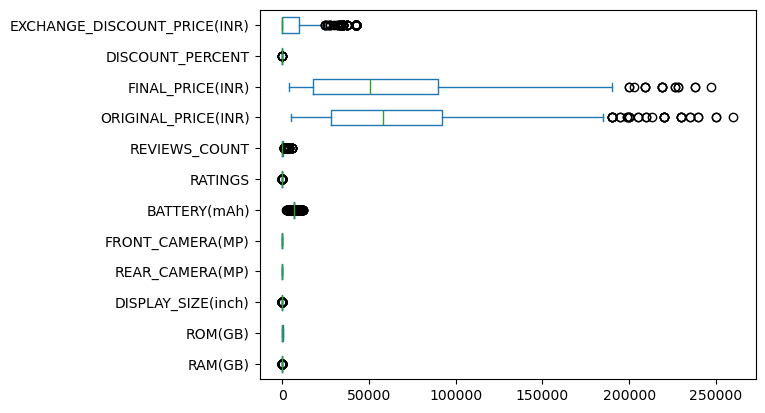

In [43]:
df_tab.plot(kind = "box",vert = False)

In [274]:
df_tab.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM(GB),885.0,5.266667,2.912189,1.0,4.0,4.0,6.00,16.0
ROM(GB),885.0,167.119774,135.942842,1.0,64.0,128.0,256.00,512.0
DISPLAY_SIZE(inch),885.0,10.767984,1.657504,6.7,10.1,11.0,11.45,14.6
REAR_CAMERA(MP),885.0,10.386441,2.589536,2.0,8.0,12.0,12.00,16.0
FRONT_CAMERA(MP),885.0,8.793220,3.547502,0.3,5.0,8.0,12.00,13.0
BATTERY(mAh),885.0,7246.693785,1523.525993,2500.0,7100.0,7100.0,7100.00,12140.0
RATINGS,885.0,4.437062,0.356714,2.7,4.4,4.6,4.70,4.8
REVIEWS_COUNT,885.0,424.051977,807.374758,0.0,13.0,87.0,449.00,5749.0
ORIGINAL_PRICE(INR),885.0,67211.641808,49669.466251,4999.0,28000.0,57900.0,91999.00,259900.0
FINAL_PRICE(INR),885.0,60123.374011,48011.163501,3999.0,17999.0,50889.0,89900.00,247319.0


In [303]:
def outlier_detection(df_tab,col):
    Q1,Q2,Q3 = df_tab[col].quantile([0.25,0.5,0.75])
    IQR = Q3 - Q1
    upper_whisker = Q3 + 1.5*IQR
    outliers = df_tab[df_tab[col] > upper_whisker]
    return len(outliers),outliers,upper_whisker

In [304]:
count,outliter_df,upper_whisker_price = outlier_detection(df_tab,"FINAL_PRICE(INR)")

In [305]:
count

17

In [310]:
outliter_df

,TITLE,BRAND,MODEL,RAM(GB),ROM(GB),DISPLAY_SIZE(inch),CONNECTIVITY_TYPE,REAR_CAMERA(MP),FRONT_CAMERA(MP),BATTERY(mAh),VERSION,WARRENTY,RATINGS,REVIEWS_COUNT,ORIGINAL_PRICE(INR),FINAL_PRICE(INR),DISCOUNT_PERCENT,EXCHANGE_DISCOUNT_PRICE(INR)
209,Apple 2022 iPad Pro (6th Gen) 2 TB ROM 12.9 in...,Apple,Unknown,4,128,12.9,Wi-Fi+SIM,12.0,12.0,7100,iPadOS,1,4.6,7,234900,226389,3,0
317,Apple 2022 iPad Pro (6th Gen) 2 TB ROM 12.9 in...,Apple,Unknown,4,128,12.9,Wi-Fi+SIM,12.0,12.0,7100,iPadOS,1,4.6,7,234900,226389,3,42600
336,Apple 2024 iPad Pro (M4) 2 TB ROM 11.0 Inch wi...,Apple,Unknown,4,128,11.0,Wi-Fi+SIM,12.0,12.0,7100,iOS,0,4.6,13,229900,218769,4,0
337,Apple 2024 iPad Pro (M4) 2 TB ROM 11.0 Inch wi...,Apple,Unknown,4,128,11.0,Wi-Fi+SIM,12.0,12.0,7100,iOS,0,4.6,13,219900,209259,4,0
338,Apple 2024 iPad Pro (M4) 2 TB ROM 11.0 Inch wi...,Apple,Unknown,4,128,11.0,Wi-Fi+SIM,12.0,12.0,7100,iOS,0,4.6,13,229900,218769,4,0
339,Apple 2024 iPad Pro (M4) 2 TB ROM 11.0 Inch wi...,Apple,Unknown,4,128,11.0,Wi-Fi+SIM,12.0,12.0,7100,iOS,0,4.6,13,219900,209259,4,0
347,Apple 2024 iPad Pro (M4) 2 TB ROM 13.0 Inch wi...,Apple,Unknown,4,128,13.0,Wi-Fi+SIM,12.0,12.0,7100,iOS,0,4.3,1,249900,237799,4,0
348,Apple 2024 iPad Pro (M4) 2 TB ROM 13.0 Inch wi...,Apple,Unknown,4,128,13.0,Wi-Fi+SIM,12.0,12.0,7100,iOS,0,4.3,1,249900,237799,4,0
351,Apple 2024 iPad Pro (M4) 2 TB ROM 13.0 Inch wi...,Apple,Unknown,4,128,13.0,Wi-Fi only,12.0,12.0,7100,iOS,0,4.3,1,229900,218769,4,0
354,Apple 2024 iPad Pro (M4) 2 TB ROM 11.0 Inch wi...,Apple,Unknown,4,128,11.0,Wi-Fi only,12.0,12.0,7100,iOS,0,4.6,13,209900,199739,4,0


### “17 high-priced tablets were detected as outliers using the IQR method.Manual inspection showed that these belong to premium brands (e.g., Apple, Samsung), indicating they are genuine observations rather than data errors. Therefore, these values were retained for analysis.”

### Converting all Catergorical columns to lowercase

In [346]:
cols_to_lower = ['TITLE','MODEL' ,'BRAND', 'CONNECTIVITY_TYPE', 'VERSION']

for col in cols_to_lower:
    df_tab[col] = df_tab[col].str.lower().str.strip()

In [347]:
df_tab.head(20)

,TITLE,BRAND,MODEL,RAM(GB),ROM(GB),DISPLAY_SIZE(inch),CONNECTIVITY_TYPE,REAR_CAMERA(MP),FRONT_CAMERA(MP),BATTERY(mAh),VERSION,WARRENTY,RATINGS,REVIEWS_COUNT,ORIGINAL_PRICE(INR),FINAL_PRICE(INR),DISCOUNT_PERCENT,EXCHANGE_DISCOUNT_PRICE(INR)
0,redmi pad se 8 gb ram 128 gb rom 11.0 inch wi...,redmi,pad se,8,128,11.00,wi-fi only,8.0,5.0,8000,android,1,4.4,989,19999,12999,35,9800
1,oneplus pad lite 6 gb ram 128 gb rom 11.0 inch...,oneplus,pad lite,6,128,11.00,wi-fi only,5.0,5.0,9340,others,1,4.4,111,19999,14999,25,11200
2,redmi pad 2 6 gb ram 128 gb rom 11.0 inch with...,redmi,pad 2,6,128,11.00,wi-fi+sim,12.0,5.0,9000,android,1,4.3,157,19999,15999,20,12100
3,redmi pad se 8 gb ram 128 gb rom 11.0 inch wi...,redmi,pad se,8,128,11.00,wi-fi only,8.0,5.0,8000,android,1,4.4,989,19999,12999,35,9800
4,samsung galaxy tab s9 fe+ 8 gb ram 128 gb rom ...,samsung,galaxy tab s9 fe+,8,128,12.40,wi-fi only,8.0,12.0,10090,android,1,4.6,1047,59999,29375,51,0
5,realme pad 2 6 gb ram 128 gb rom 11.5 inch wit...,realme,pad 2,6,128,11.50,wi-fi+sim,8.0,5.0,8360,android,1,4.4,2767,28999,14799,48,11200
6,redmi pad se 4 gb ram 128 gb rom 11.0 inch wi...,redmi,pad se,4,128,11.00,wi-fi only,8.0,5.0,8000,android,1,4.4,989,14999,11999,20,9000
7,realme pad 2 6 gb ram 128 gb rom 11.5 inch wit...,realme,pad 2,6,128,11.50,wi-fi+sim,8.0,5.0,8360,android,1,4.4,2767,28999,14799,48,11200
8,samsung galaxy tab a9+ 8 gb ram 128 gb rom 11....,samsung,galaxy tab a9+,8,128,11.00,wi-fi+sim,8.0,5.0,7040,android,1,4.5,1464,32999,24999,24,18300
9,oppo pad se 6 gb ram 128 gb rom 10.95 inch wit...,oppo,pad se,6,128,10.95,wi-fi+sim,5.0,5.0,9340,android,1,4.4,151,20999,15999,23,12100


- Now the dataset has no missing values,duplicates,outliers and each  column are of correct data type and categorical columns are in correct format.
- Now the dataset is consistent and ready for analysis. 

In [348]:
df_tab.to_csv("Tablets_Cleaned_Data.csv",index = False)

## EDA after Cleaning

In [3]:
df_tablet = pd.read_csv("Tablets_Cleaned_Data.csv")

In [4]:
df_tablet.shape

(885, 18)

In [5]:
df_tablet.head()

,TITLE,BRAND,MODEL,RAM(GB),ROM(GB),DISPLAY_SIZE(inch),CONNECTIVITY_TYPE,REAR_CAMERA(MP),FRONT_CAMERA(MP),BATTERY(mAh),VERSION,WARRENTY,RATINGS,REVIEWS_COUNT,ORIGINAL_PRICE(INR),FINAL_PRICE(INR),DISCOUNT_PERCENT,EXCHANGE_DISCOUNT_PRICE(INR)
0,redmi pad se 8 gb ram 128 gb rom 11.0 inch wi...,redmi,pad se,8,128,11.0,wi-fi only,8.0,5.0,8000,android,1,4.4,989,19999,12999,35,9800
1,oneplus pad lite 6 gb ram 128 gb rom 11.0 inch...,oneplus,pad lite,6,128,11.0,wi-fi only,5.0,5.0,9340,others,1,4.4,111,19999,14999,25,11200
2,redmi pad 2 6 gb ram 128 gb rom 11.0 inch with...,redmi,pad 2,6,128,11.0,wi-fi+sim,12.0,5.0,9000,android,1,4.3,157,19999,15999,20,12100
3,redmi pad se 8 gb ram 128 gb rom 11.0 inch wi...,redmi,pad se,8,128,11.0,wi-fi only,8.0,5.0,8000,android,1,4.4,989,19999,12999,35,9800
4,samsung galaxy tab s9 fe+ 8 gb ram 128 gb rom ...,samsung,galaxy tab s9 fe+,8,128,12.4,wi-fi only,8.0,12.0,10090,android,1,4.6,1047,59999,29375,51,0


In [6]:
df_tablet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TITLE                         885 non-null    object 
 1   BRAND                         885 non-null    object 
 2   MODEL                         885 non-null    object 
 3   RAM(GB)                       885 non-null    int64  
 4   ROM(GB)                       885 non-null    int64  
 5   DISPLAY_SIZE(inch)            885 non-null    float64
 6   CONNECTIVITY_TYPE             885 non-null    object 
 7   REAR_CAMERA(MP)               885 non-null    float64
 8   FRONT_CAMERA(MP)              885 non-null    float64
 9   BATTERY(mAh)                  885 non-null    int64  
 10  VERSION                       885 non-null    object 
 11  WARRENTY                      885 non-null    int64  
 12  RATINGS                       885 non-null    float64
 13  REVIE

In [7]:
df_tablet.duplicated().sum()

0

In [8]:
df_tablet.isnull().sum()

TITLE                           0
BRAND                           0
MODEL                           0
RAM(GB)                         0
ROM(GB)                         0
DISPLAY_SIZE(inch)              0
CONNECTIVITY_TYPE               0
REAR_CAMERA(MP)                 0
FRONT_CAMERA(MP)                0
BATTERY(mAh)                    0
VERSION                         0
WARRENTY                        0
RATINGS                         0
REVIEWS_COUNT                   0
ORIGINAL_PRICE(INR)             0
FINAL_PRICE(INR)                0
DISCOUNT_PERCENT                0
EXCHANGE_DISCOUNT_PRICE(INR)    0
dtype: int64

In [9]:
df_tablet.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM(GB),885.0,5.266667,2.912189,1.0,4.0,4.0,6.00,16.0
ROM(GB),885.0,167.119774,135.942842,1.0,64.0,128.0,256.00,512.0
DISPLAY_SIZE(inch),885.0,10.767984,1.657504,6.7,10.1,11.0,11.45,14.6
REAR_CAMERA(MP),885.0,10.386441,2.589536,2.0,8.0,12.0,12.00,16.0
FRONT_CAMERA(MP),885.0,8.793220,3.547502,0.3,5.0,8.0,12.00,13.0
BATTERY(mAh),885.0,7246.693785,1523.525993,2500.0,7100.0,7100.0,7100.00,12140.0
WARRENTY,885.0,0.802260,0.412469,0.0,1.0,1.0,1.00,2.0
RATINGS,885.0,4.437062,0.356714,2.7,4.4,4.6,4.70,4.8
REVIEWS_COUNT,885.0,424.051977,807.374758,0.0,13.0,87.0,449.00,5749.0
ORIGINAL_PRICE(INR),885.0,67211.641808,49669.466251,4999.0,28000.0,57900.0,91999.00,259900.0


In [10]:
df_tablet.groupby(by = ["BRAND"])[["FINAL_PRICE(INR)"]].mean().sort_values(by = "FINAL_PRICE(INR)",ascending=False)

,FINAL_PRICE(INR)
BRAND,
apple,91405.953380
samsung,54191.341176
oneplus,33665.666667
tcl,31801.857143
honor,30999.000000
xiaomi,27841.857143
poco,24665.666667
acer,20048.300000
huawei,19994.500000


In [11]:
df_tablet['CONNECTIVITY_TYPE'] = df_tablet['CONNECTIVITY_TYPE'].str.replace("_only",'')
df_tablet['CONNECTIVITY_TYPE'] = df_tablet['CONNECTIVITY_TYPE'].str.replace("+",'_')

## Uni-variate Analysis

### Categorical columns

In [12]:
categorial_columns = df_tablet.select_dtypes(exclude = np.number).columns
categorial_columns

Index(['TITLE', 'BRAND', 'MODEL', 'CONNECTIVITY_TYPE', 'VERSION'], dtype='object')

## 1. What are the most common tablet brands available in the Indian market?

In [13]:
df_tablet["BRAND"].value_counts()

BRAND
apple           429
samsung         170
lenovo           70
realme           35
redmi            25
swipe            17
i                15
oneplus          12
acer             10
iball            10
wishtel           9
nokia             9
motorola          9
domo              8
xiaomi            7
tcl               7
oppo              7
brighteureka      6
infinix           6
lava              4
micromax          4
poco              3
contixo           3
hp                2
itel              2
honor             2
huawei            2
panasonic         1
baatu             1
Name: count, dtype: int64

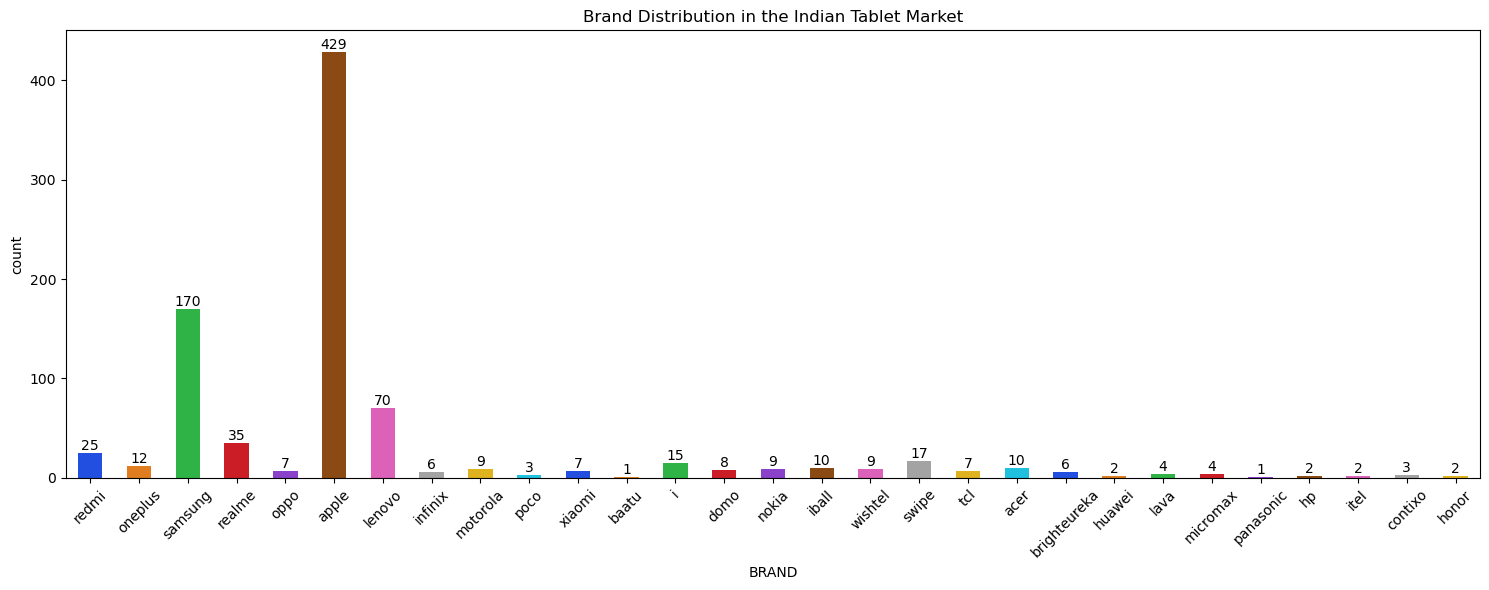

In [14]:
plt.figure(figsize = (15,6))
ax = sns.countplot(data = df_tablet,x = "BRAND",width = 0.5, palette = "bright",legend = False)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Brand Distribution in the Indian Tablet Market",fontsize = 12)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### The chart shows a highly uneven brand distribution in the Indian tablet market. Apple dominates the dataset with the largest share (429 models), followed by Samsung with a significant but smaller count (170). Lenovo forms the mid-tier segment with around 70 entries. All other brands - including Redmi, OnePlus, Realme, Oppo, Infinix, Motorola, and others - appear in very small numbers, indicating limited product ranges or lower market presence. This imbalance suggests that pricing trends in the Indian tablet market are shaped mainly by Apple and Samsung, with most other brands contributing minimally.

## 2. Which connectivity type is more common among tablets — Wi-Fi or Wi-Fi + SIM ?

In [15]:
connectivity = df_tablet["CONNECTIVITY_TYPE"].value_counts(normalize = True) * 100
connectivity

CONNECTIVITY_TYPE
wi-fi_sim     55.706215
wi-fi only    44.293785
Name: proportion, dtype: float64

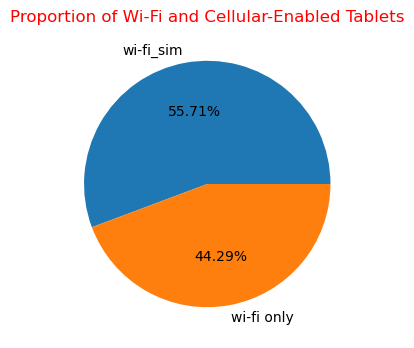

In [16]:
plt.figure(figsize = (6,4))
plt.pie(x = connectivity, 
        autopct = "%1.2f%%", 
        labels = connectivity.index); 
plt.title("Proportion of Wi-Fi and Cellular-Enabled Tablets",fontsize = 12,color = "red")
plt.show()

### Calling tablets are in the majority at roughly 56%, while Wi-Fi-only models account for about 44%. This indicates a stronger market preference for cellular-enabled tablets, likely due to the added flexibility of using mobile data and calling features without relying on Wi-Fi.

## 3. What are the most common RAM configurations?

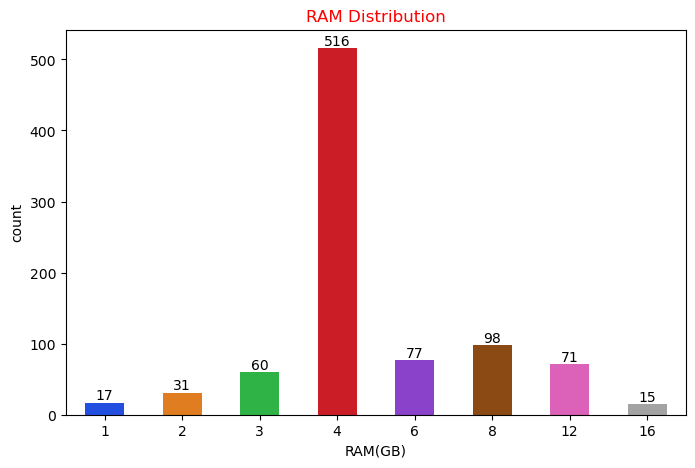

In [17]:
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df_tablet,x = "RAM(GB)",width = 0.5, palette = "bright")
for container in ax.containers:
    ax.bar_label(container)
plt.title("RAM Distribution",fontsize = 12,color = "red")
plt.show()

### Insight: Most tablets come with 4GB RAM, making it the dominant configuration. Higher RAM options like 6GB, 8GB, and 12GB appear moderately, while low RAM variants (1GB, 2GB, 3GB) are much less common, indicating that the market has shifted toward mid-range and higher-performance devices.

## 4. What are the most common storage capacities?

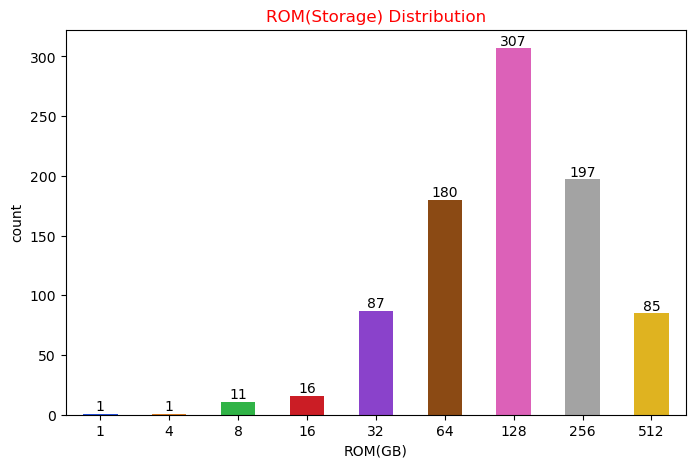

In [18]:
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df_tablet,x = "ROM(GB)",width = 0.5, palette = "bright")
for container in ax.containers:
    ax.bar_label(container)
plt.title("ROM(Storage) Distribution",fontsize = 12,color = "red")
plt.show()

### Insight: Most tablets come with 128GB ROM, followed by 256GB, 64GB, and 512GB.Very low storage options like 1GB, 4GB, 8GB, and 16GB are not practical and should be avoided.For real-world usage, 128GB or 256GB models are ideal, and 64GB should be considered the minimum acceptable storage capacity.

In [19]:
numerical_col = df_tablet.select_dtypes(include = np.number).columns
numerical_col

Index(['RAM(GB)', 'ROM(GB)', 'DISPLAY_SIZE(inch)', 'REAR_CAMERA(MP)',
       'FRONT_CAMERA(MP)', 'BATTERY(mAh)', 'WARRENTY', 'RATINGS',
       'REVIEWS_COUNT', 'ORIGINAL_PRICE(INR)', 'FINAL_PRICE(INR)',
       'DISCOUNT_PERCENT', 'EXCHANGE_DISCOUNT_PRICE(INR)'],
      dtype='object')

## 5.What is the overall distribution of Tablet prices?

In [20]:
# For bins
int(np.sqrt(len(df_tablet)))

29

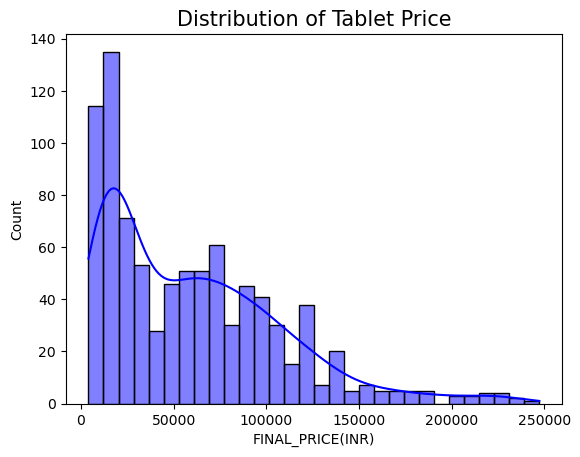

In [21]:
sns.histplot(data = df_tablet,
             x = "FINAL_PRICE(INR)",
             kde = True,
             bins = 30,
             color = "blue")
plt.title("Distribution of Tablet Price",fontsize = 15)
plt.show()  # Positive - right skewed data

In [22]:
np.linspace(df_tablet["FINAL_PRICE(INR)"].min(),df_tablet["FINAL_PRICE(INR)"].max(),31)

array([  3999.        ,  12109.66666667,  20220.33333333,  28331.        ,
        36441.66666667,  44552.33333333,  52663.        ,  60773.66666667,
        68884.33333333,  76995.        ,  85105.66666667,  93216.33333333,
       101327.        , 109437.66666667, 117548.33333333, 125659.        ,
       133769.66666667, 141880.33333333, 149991.        , 158101.66666667,
       166212.33333333, 174323.        , 182433.66666667, 190544.33333333,
       198655.        , 206765.66666667, 214876.33333333, 222987.        ,
       231097.66666667, 239208.33333333, 247319.        ])

### Insight : The price distribution is heavily right-skewed.Most tablets fall between ₹10,000 and ₹30,000,while high-end models above ₹80,000 are far fewer. This shows that the Indian tablet market is dominated by affordable and mid-range products, with premium devices forming only a small portion of the overall market.

## Bi-variate Analysis

### Continuous Vs Continuous

In [23]:
df_tablet["BATTERY_numeric"] = np.where(
    df_tablet["BRAND"].str.lower() != "apple",
    df_tablet["BATTERY(mAh)"],  
    np.nan                      
)

In [24]:
df_tablet["BATTERY_numeric"].dtype

dtype('float64')

## 6.How does battery capacity relate to price?

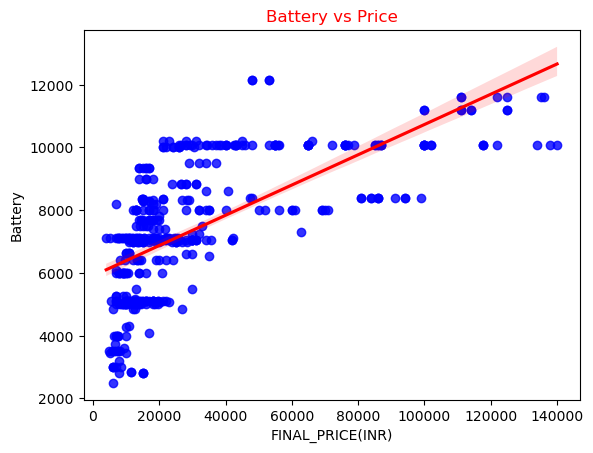

In [25]:
sns.regplot(data = df_tablet, y = "BATTERY_numeric",x = "FINAL_PRICE(INR)",
            line_kws = {"color":"r"},scatter=True,
            scatter_kws = {"marker" : "o","color": "blue"})
plt.title("Battery vs Price",fontsize = 12,color = "red")
plt.ylabel("Battery")
plt.show()

### Insight: The scatter plot shows that tablets with higher prices usually come with larger battery capacity.Most mid-range models (₹10k–₹40k) use 5,000–8,000 mAh batteries, while premium tablets priced above ₹80k often have batteries over 9,000 mAh. The upward trend line shows a positive relationship between battery size and price, although budget tablets still show mixed battery capacities.

## 7.Do larger displays result in higher prices?

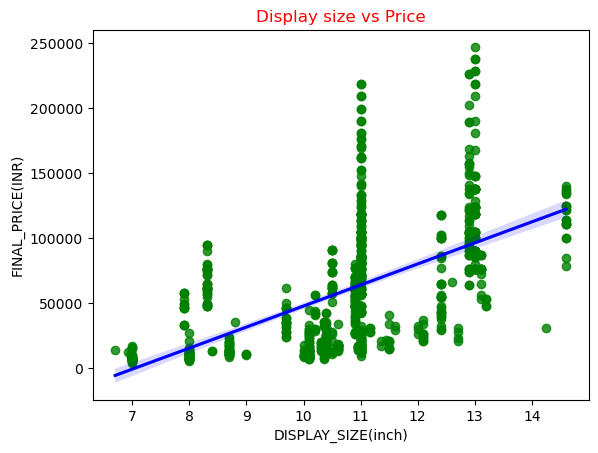

In [26]:
sns.regplot(data = df_tablet, x = "DISPLAY_SIZE(inch)",y = "FINAL_PRICE(INR)",
            line_kws = {"color":"b"},scatter=True,
            scatter_kws = {"marker" : "v","color": "g"})
plt.title("Display size vs Price",fontsize = 12,color = "red")
plt.show()

### Insight: The scatterplot shows that tablet prices generally increase with display size. However, some larger-display models are still priced lower, indicating that factors like RAM, storage, brand, and connectivity also influence overall pricing.

### Catergorical vs Continuous

## 8.Do Wi-Fi + SIM models cost more than Wi-Fi-only?

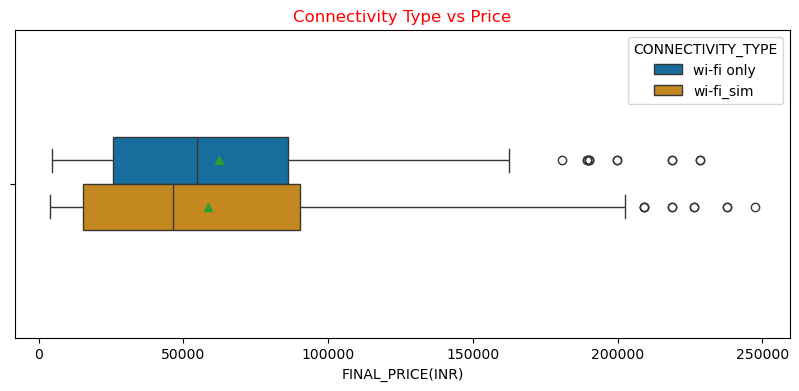

In [27]:
plt.figure(figsize = (10,4))
sns.boxplot(data = df_tablet, x = "FINAL_PRICE(INR)" , hue = "CONNECTIVITY_TYPE",
            width = 0.3,showfliers = True, showmeans = True,palette = "colorblind")
plt.title("Connectivity Type vs Price",fontsize = 12 ,color = "red") # triangle show mean
plt.show()

### Insight : Calling tablets show a wider price range and generally higher prices compared to Wi-Fi-only models. The outliers mostly represent premium tablets from brands like Apple.


In [28]:
df_tablet["WARRENTY_cat"] = df_tablet["WARRENTY"].map({1: "1 Year_Warrenty",
                                                       2 : "2 Year_Warrenty",
                                                       0 : "NO Warrenty"})

In [29]:
df_tablet["WARRENTY_cat"].value_counts()

WARRENTY_cat
1 Year_Warrenty    700
NO Warrenty        180
2 Year_Warrenty      5
Name: count, dtype: int64

## 9. What is hightest average price for each brand?

In [30]:
df_tablet.groupby(by = "BRAND")[["FINAL_PRICE(INR)"]].mean().sort_values(by = "FINAL_PRICE(INR)",ascending = False)

,FINAL_PRICE(INR)
BRAND,
apple,91405.953380
samsung,54191.341176
oneplus,33665.666667
tcl,31801.857143
honor,30999.000000
xiaomi,27841.857143
poco,24665.666667
acer,20048.300000
huawei,19994.500000


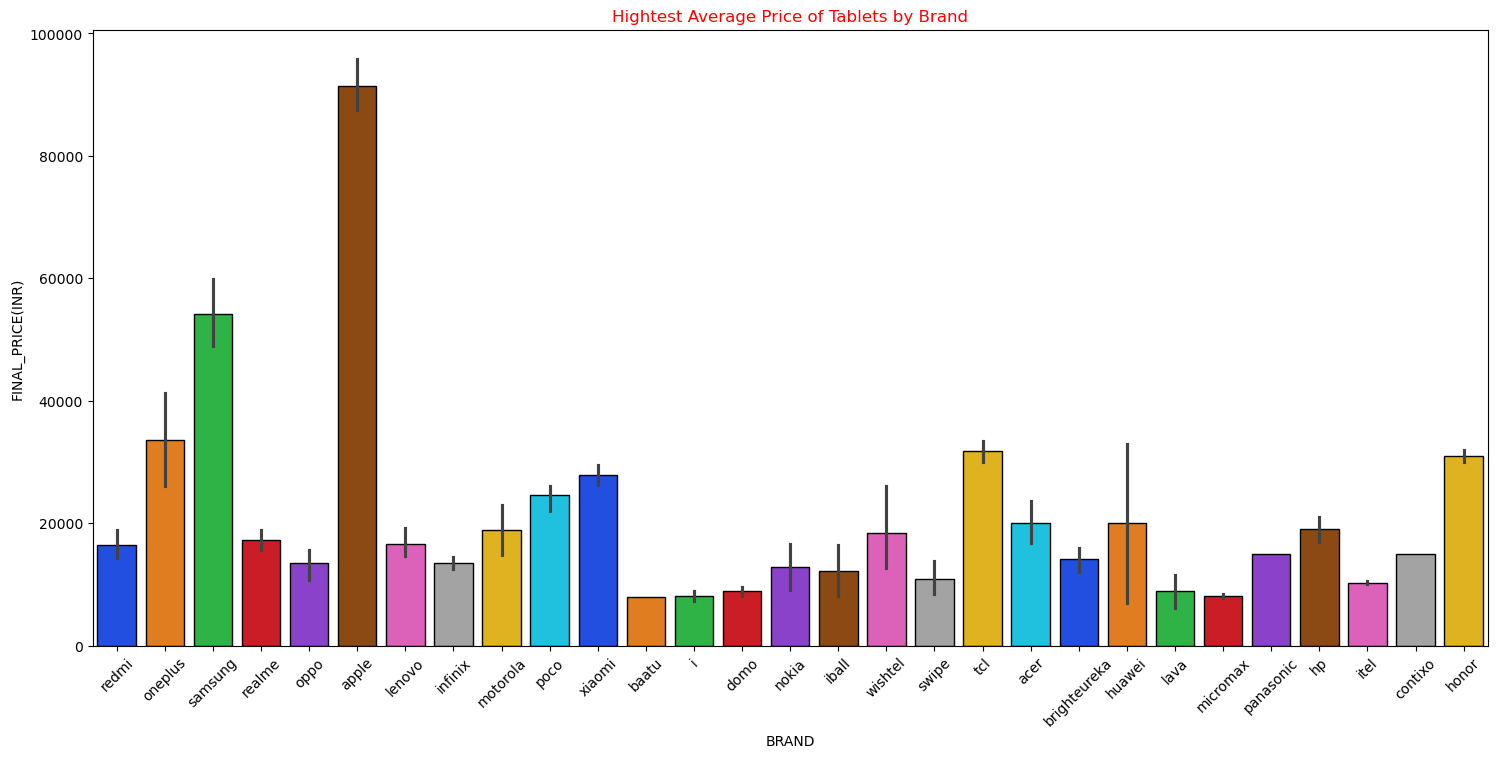

In [32]:
plt.figure(figsize = (18,8))
sns.barplot(data = df_tablet,x = "BRAND", y = "FINAL_PRICE(INR)",
            edgecolor = "black",palette = "bright", estimator = "mean")
plt.title("Hightest Average Price of Tablets by Brand",fontsize = 12, color = "red")
plt.xticks(rotation = 45)
plt.show()

### Insight : Apple has the highest average tablet price by a wide margin, followed by Samsung and OnePlus. Most other brands fall into the budget and mid-range categories, showing that premium pricing is concentrated within only a few top brands.

## 10.Does higher RAM lead to higher prices?

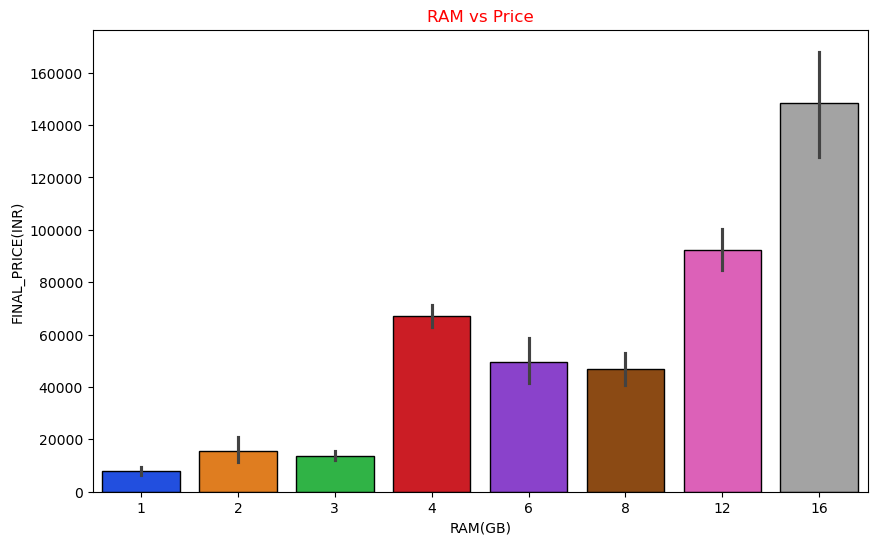

In [55]:
plt.figure(figsize = (10,6))
ax = sns.barplot(data = df_tablet,x = "RAM(GB)", y = "FINAL_PRICE(INR)",
            edgecolor = "black",palette = "bright",estimator = "mean")
plt.title("RAM vs Price",fontsize = 12,color = "red")
plt.show()

### Insight : Tablet prices generally increase as RAM increases, especially from 8GB upward.However, some higher-RAM models still show lower prices, indicating that RAM alone doesn’t determine price and other factors like brand, storage, and display size also influence the final cost.

## 10.Does higher ROM lead to higher prices?

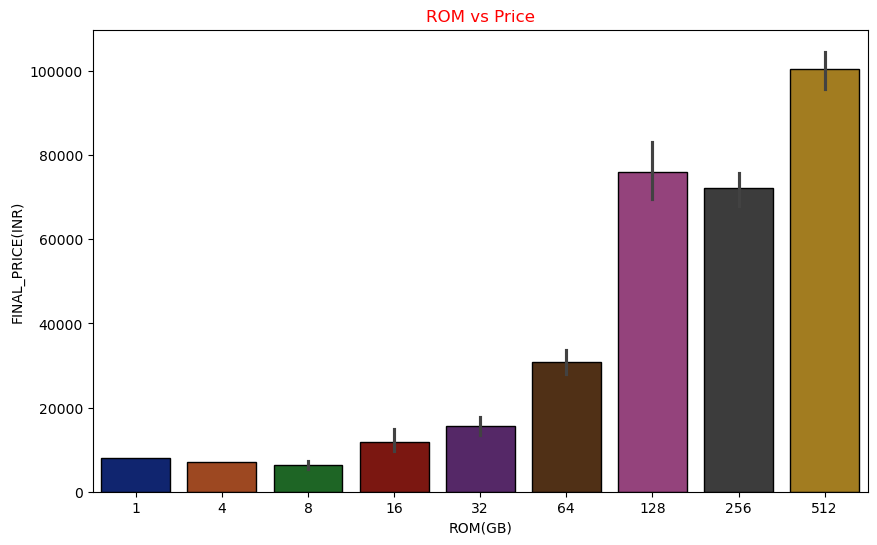

In [56]:
plt.figure(figsize = (10,6))
sns.barplot(data = df_tablet,x = "ROM(GB)", y = "FINAL_PRICE(INR)",
            edgecolor = "black",palette = "dark",estimator = "mean")
plt.title("ROM vs Price",fontsize = 12,color = "red")
plt.show()

### Insight : Tablet prices increase noticeably with higher ROM, especially from 64GB onward. However, a few higher-ROM models still appear at lower prices, showing that storage capacity is not the only factor determining price -brand, RAM, and display size also influence overall pricing.

# Multivariate Analysis

In [51]:
numerical_col

Index(['RAM(GB)', 'ROM(GB)', 'DISPLAY_SIZE(inch)', 'REAR_CAMERA(MP)',
       'FRONT_CAMERA(MP)', 'BATTERY(mAh)', 'WARRENTY', 'RATINGS',
       'REVIEWS_COUNT', 'ORIGINAL_PRICE(INR)', 'FINAL_PRICE(INR)',
       'DISCOUNT_PERCENT', 'EXCHANGE_DISCOUNT_PRICE(INR)'],
      dtype='object')

## 11.Which numeric specifications most strongly correlate with price?

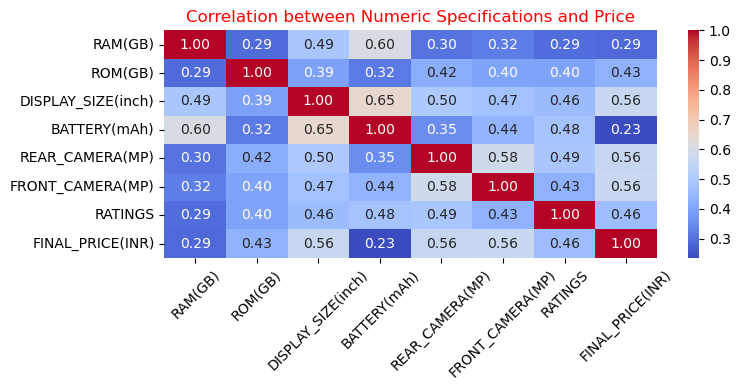

In [15]:
numeric_columns = ['RAM(GB)', 'ROM(GB)', 'DISPLAY_SIZE(inch)', 'BATTERY(mAh)',
                'REAR_CAMERA(MP)', 'FRONT_CAMERA(MP)', 'RATINGS', 'FINAL_PRICE(INR)']

corr = df_tablet[numeric_columns].corr(numeric_only=True)

plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Numeric Specifications and Price",fontsize = 12, color = "red")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Insight : Display size, rear camera, and front camera show the moderate positive correlations with price, followed by ROM. Battery capacity and RAM have weaker relationships with price. Overall, the heatmap indicates that larger displays and better camera specs contribute more to higher tablet prices than battery or RAM alone.

## 12.How do RAM, battery, and display size together influence pricing tiers?

<Figure size 100x100 with 0 Axes>

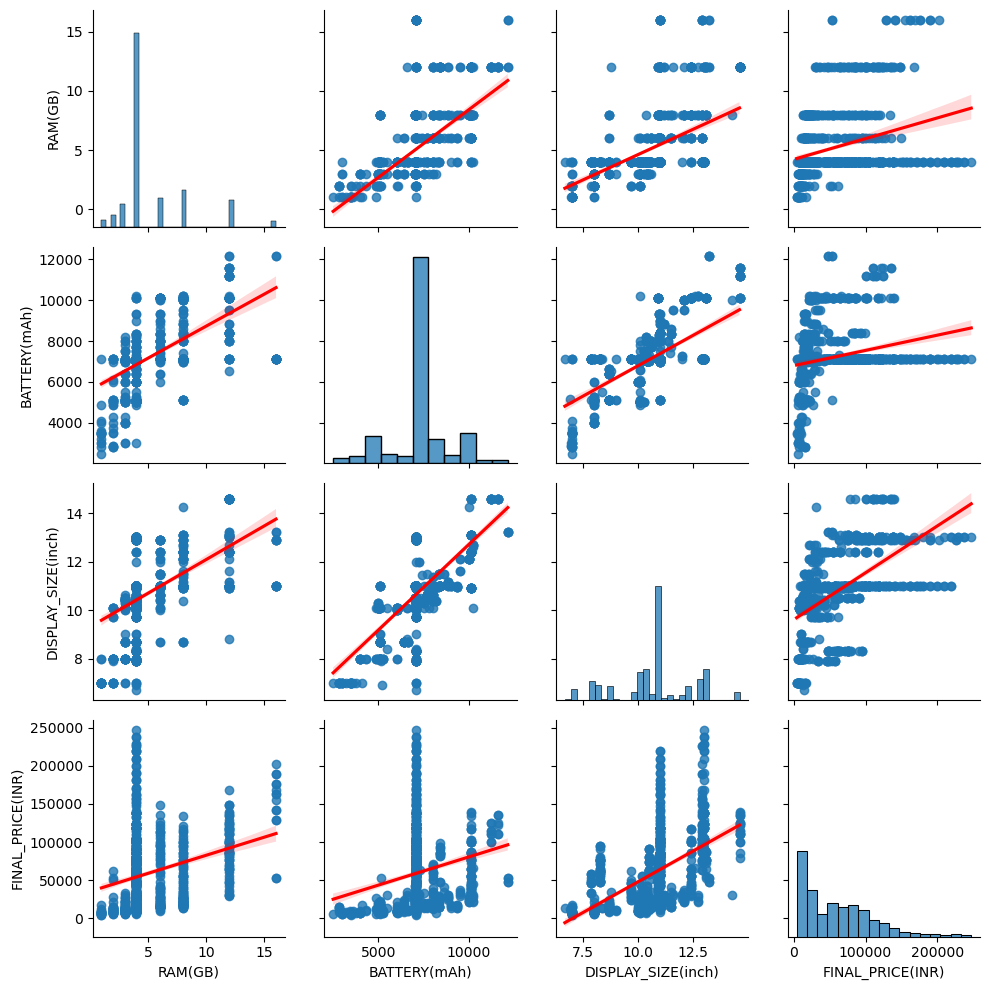

In [8]:
num_cols = ["RAM(GB)","BATTERY(mAh)","DISPLAY_SIZE(inch)", "FINAL_PRICE(INR)"]
plt.figure(figsize=(1,1))
sns.pairplot(df_tablet[num_cols],kind = "reg",
             plot_kws = {"line_kws" : {"color":
                                        "r"}})
plt.tight_layout()
plt.show()
# plt.savefig("Tablets_pairplots.jpg", format = "jpeg", dpi = 300)

### Insight : The pair plot shows correlation between RAM, display size, battery, and Final PRICE. Display size and battery show positive correlation with FINAL PRICE. It means as display size and battery capacity increases automatically price increases.